# Домашнее задание. Библиотека sklearn и классификация с помощью KNN

## Описание домашнего задания

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [8]:
# !gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
# !gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

### **Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [9]:
import pathlib
import shelve

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from numpy.typing import ArrayLike, NDArray
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
MODELS_DIR = pathlib.Path("models")
MODELS_DIR.mkdir(exist_ok=True)
assert MODELS_DIR.exists(), "could not create models directory"

### **Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`.

Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [11]:
DATA_PATH = "https://raw.githubusercontent.com/relicks/dls-2024-1/refs/heads/main/data/hw_4_2/"

In [12]:
data = pd.read_csv(DATA_PATH + "game_of_thrones_train.csv", index_col="S.No")

In [13]:
data.head(3)

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1


### **Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   DateoFdeath       307 non-null    float64
 6   mother            18 non-null     object 
 7   father            22 non-null     object 
 8   heir              21 non-null     object 
 9   house             1176 non-null   object 
 10  spouse            200 non-null    object 
 11  book1             1557 non-null   int64  
 12  book2             1557 non-null   int64  
 13  book3             1557 non-null   int64  
 14  book4             1557 non-null   int64  
 15  book5             1557 non-null   int64  
 16  isAliveMother     18 non-null     float64
 17  

In [15]:
data.isna().sum().sort_values(ascending=False)

mother              1539
isAliveMother       1539
isAliveHeir         1536
heir                1536
isAliveFather       1535
father              1535
isAliveSpouse       1357
spouse              1357
dateOfBirth         1278
age                 1278
DateoFdeath         1250
culture             1069
title                840
house                381
isNoble                0
isMarried              0
numDeadRelations       0
popularity             0
name                   0
book3                  0
book5                  0
book4                  0
book2                  0
book1                  0
male                   0
isAlive                0
dtype: int64

> Оставим только те признаки, у которых количество пропусков меньше 50%. `name` можно также удалить, так как его предиктивная способность сомнительна.

In [16]:
sel_feats = [
    "book1",
    "book2",
    "book3",
    "book4",
    "book5",
    "house",
    "isMarried",
    "isNoble",
    "male",
    "numDeadRelations",
    "popularity",
    "isAlive",
]

In [17]:
data.loc[:, sel_feats].head()

,book1,book2,book3,book4,book5,house,isMarried,isNoble,male,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,
1,0,0,0,0,0,NaN,0,0,1,11,0.605351,0
2,1,1,1,1,1,House Frey,1,1,1,1,0.896321,1
3,0,0,0,1,0,House Swyft,0,1,1,0,0.267559,1
4,0,0,0,0,0,House Arryn,1,1,0,0,0.183946,0
5,0,0,0,1,0,House Santagar,1,1,0,0,0.043478,1


### **Задание 1.4.** Создайте новые признаки.

* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [18]:
dataset = data.loc[:, sel_feats].assign(
    isPopular=data.loc[:, "popularity"].map(lambda val: val > 0.5),
    boolDeadRelations=data.loc[:, "numDeadRelations"].map(lambda val: val > 0),
)

In [19]:
dataset.head()

,book1,book2,book3,book4,book5,house,isMarried,isNoble,male,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,
1,0,0,0,0,0,NaN,0,0,1,11,0.605351,0,True,True
2,1,1,1,1,1,House Frey,1,1,1,1,0.896321,1,True,True
3,0,0,0,1,0,House Swyft,0,1,1,0,0.267559,1,False,False
4,0,0,0,0,0,House Arryn,1,1,0,0,0.183946,0,False,False
5,0,0,0,1,0,House Santagar,1,1,0,0,0.043478,1,False,False


In [20]:
# Подсказка
cult = {
    "Summer Islands": ["summer islands", "summer islander", "summer isles"],
    "Ghiscari": ["ghiscari", "ghiscaricari", "ghis"],
    "Asshai": ["asshai'i", "asshai"],
    "Lysene": ["lysene", "lyseni"],
    "Andal": ["andal", "andals"],
    "Braavosi": ["braavosi", "braavos"],
    "Dornish": ["dornishmen", "dorne", "dornish"],
    "Myrish": ["myr", "myrish", "myrmen"],
    "Westermen": ["westermen", "westerman", "westerlands"],
    "Westerosi": ["westeros", "westerosi"],
    "Stormlander": ["stormlands", "stormlander"],
    "Norvoshi": ["norvos", "norvoshi"],
    "Northmen": ["the north", "northmen"],
    "Free Folk": ["wildling", "first men", "free folk"],
    "Qartheen": ["qartheen", "qarth"],
    "Reach": ["the reach", "reach", "reachmen"],
}

### **Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. 

Удалите ненужные столбцы по вашему мнению.

In [21]:
# data.drop(columns=[...], inplace = True)

<Axes: >

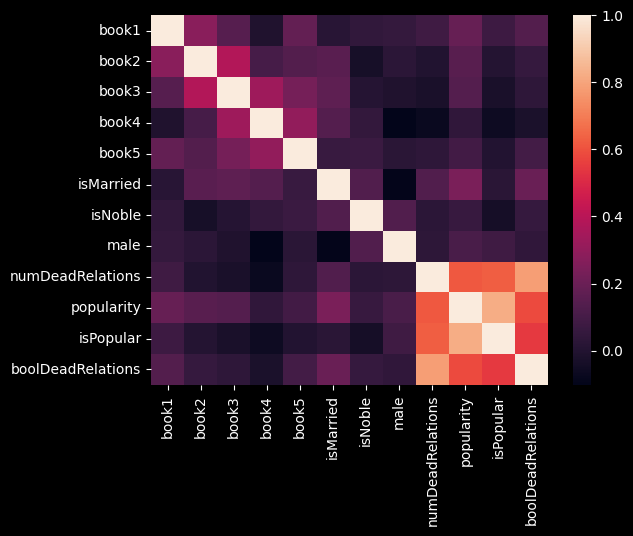

In [22]:
sns.heatmap(dataset.drop(["house", "isAlive"], axis=1).corr())

In [23]:
import statsmodels.api as sm

from dls_2024_1.feature_importance import FeatureImportanceForest, PermutationImportanceForest

In [24]:
X = dataset.drop(["house", "isAlive"], axis=1)
y = dataset.loc[:, "isAlive"]

# Convert boolean columns to integers
X["isPopular"] = X["isPopular"].astype(int)
X["boolDeadRelations"] = X["boolDeadRelations"].astype(int)

In [25]:
ols = sm.OLS(y, sm.add_constant(X))
result = ols.fit()

In [26]:
summary = result.summary2().tables[1]
summary.query("`P>|t|` > 0.1").sort_values(by="P>|t|", ascending=False)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
book5,-0.007310,0.022287,-0.327982,0.742970,-0.051026,0.036407
isMarried,-0.011314,0.032445,-0.348700,0.727362,-0.074955,0.052328
boolDeadRelations,-0.032932,0.078239,-0.420913,0.673877,-0.186398,0.120534
book2,-0.019280,0.023360,-0.825343,0.409305,-0.065100,0.026540
book3,-0.019669,0.022762,-0.864129,0.387651,-0.064317,0.024978
isNoble,-0.026187,0.020149,-1.299673,0.193907,-0.065710,0.013335


> Из t-статистики из отчёта выше видно, что некоторые признаки имеют низкую предсказательную важность.
>> - `book2`
>> - `book3`
>> - `book5`
>> - `isMarried`
>> - `isNoble`
>> - `boolDeadRelations`

In [27]:
fif = FeatureImportanceForest(X, y, X.columns)

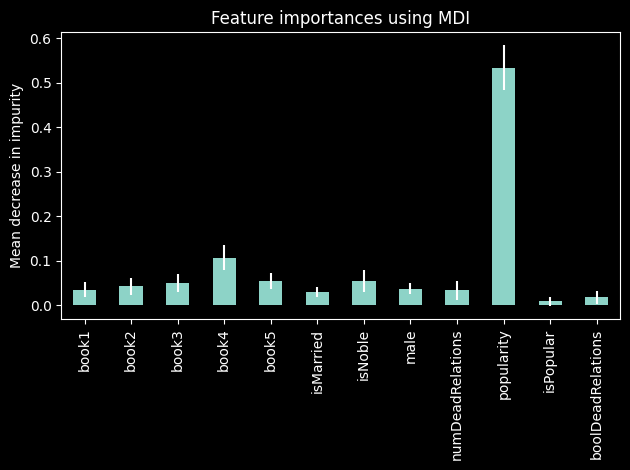

In [28]:
fif.plot()

In [29]:
pif = PermutationImportanceForest(X, y)

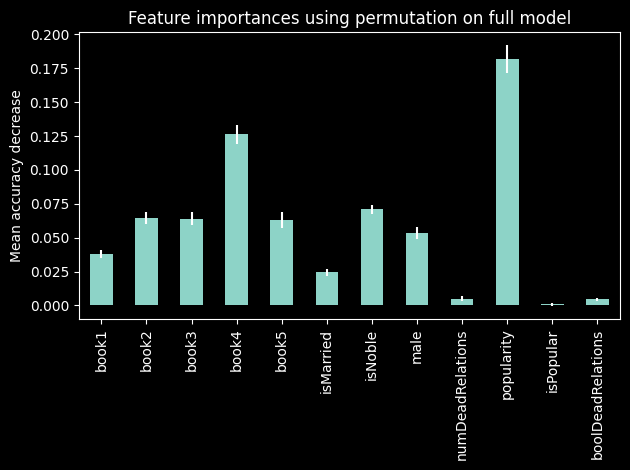

In [30]:
pif.plot()

> Как видно из графика, приведённого выше, такие признаки, как `numDeadRelations`, 
> `boolDeadRelations` и `isPopular` слабо влияют на предсказательную точность.
> Следовательно, их можно удалить.

> Тогда, выбранные признаки таковы:

In [31]:
selected_features = [
    "book1",
    "book2",
    "book3",
    "book4",
    "book5",
    "house",
    "isMarried",
    "isNoble",
    "male",
    "popularity",
]

### **Задание 1.6.** Проанализируйте целевую переменную. 

Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

<Axes: ylabel='Frequency'>

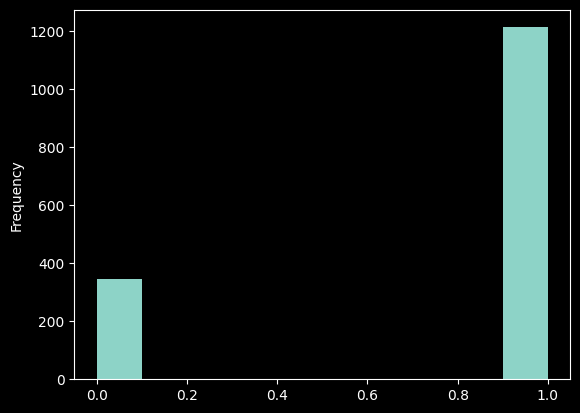

In [32]:
target = dataset.loc[:, "isAlive"]
target.plot.hist()

In [33]:
target.value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

> Целевая переменная категориальная. Датасет не сбалансирован по классам.

### **Задание 1.7.** Проанализируйте признаки.

  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [34]:
dataset.loc[:, [*selected_features, "isAlive"]].head(3)

,book1,book2,book3,book4,book5,house,isMarried,isNoble,male,popularity,isAlive
S.No,,,,,,,,,,,
1,0,0,0,0,0,NaN,0,0,1,0.605351,0
2,1,1,1,1,1,House Frey,1,1,1,0.896321,1
3,0,0,0,1,0,House Swyft,0,1,1,0.267559,1


> Все выбранные признаки численные, кроме `house`, который категориальный.

In [35]:
from sklearn.preprocessing import PowerTransformer

from dls_2024_1.typing import ColumnTransformerUnit

In [36]:
coltrans = ColumnTransformer(
    transformers=[
        ColumnTransformerUnit("onehot", OneHotEncoder(), ["house"]),
        # ColumnTransformerUnit("gaussianscaler", PowerTransformer(), ["popularity"]),
    ],
    remainder="passthrough",
)

dataset_trans = coltrans.fit_transform(dataset.loc[:, [*selected_features, "isAlive"]])

dataset_trans_df = pd.DataFrame(
    data=dataset_trans.toarray(),  # type: ignore
    columns=coltrans.get_feature_names_out(),
)
dataset_trans_df.head(3)

,onehot__house_Alchemists' Guild,onehot__house_Antler Men,onehot__house_Band of Nine,onehot__house_Black Ears,onehot__house_Blacks,onehot__house_Brave Companions,onehot__house_Brotherhood Without Banners,onehot__house_Brotherhood without banners,onehot__house_Burned Men,onehot__house_Chataya's brothel,...,remainder__book1,remainder__book2,remainder__book3,remainder__book4,remainder__book5,remainder__isMarried,remainder__isNoble,remainder__male,remainder__popularity,remainder__isAlive
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605351,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.896321,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.267559,1.0


In [37]:
(
    dataset_trans_df.corr()
    .abs()
    .apply(lambda row: row.nlargest(2).iloc[1])
    .sort_values(ascending=False)  # type: ignore
    .head(10)
)

remainder__book2             0.380968
remainder__book3             0.380968
remainder__book4             0.329153
remainder__book5             0.302338
remainder__isAlive           0.284014
remainder__book1             0.278116
onehot__house_House Frey     0.258476
remainder__isMarried         0.241898
remainder__popularity        0.241898
onehot__house_House Stark    0.210609
dtype: float64

> Между некоторыми признаками (например, `book*`) присутствует корреляция, но незначительная (< 0.4).

### **Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [38]:
dataset_trans_df.columns = [
    label.removeprefix("remainder__").removeprefix("onehot__")
    for label in dataset_trans_df.columns
]

In [39]:
X = dataset_trans_df.drop(["isAlive"], axis=1)
y = dataset_trans_df.loc[:, "isAlive"]

In [40]:
ols = sm.OLS(y, sm.add_constant(X))
result = ols.fit()

In [41]:
summary = result.summary2().tables[1]
summary.query("`P>|t|` < 0.05").sort_values(by="P>|t|", ascending=False)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
house_Queensguard,-0.741657,0.377175,-1.966349,4.948249e-02,-1.481633,-0.001681
house_House Baratheon,0.307108,0.155621,1.973439,4.866875e-02,0.001797,0.612419
house_House Lefford,-0.377892,0.189116,-1.998206,4.591386e-02,-0.748916,-0.006868
house_Alchemists' Guild,0.347171,0.170776,2.032901,4.227653e-02,0.012127,0.682216
house_House Tallhart,-0.325821,0.156532,-2.081492,3.759500e-02,-0.632920,-0.018721
house_House Byrch,-0.800043,0.378305,-2.114811,3.464640e-02,-1.542236,-0.057850
house_House Stark,0.125215,0.058172,2.152489,3.155258e-02,0.011087,0.239342
house_House Toyne,-0.868846,0.377288,-2.302870,2.145213e-02,-1.609045,-0.128647
house_House Payne,-0.911665,0.377131,-2.417373,1.577743e-02,-1.651554,-0.171776
house_House Tyrell,0.171133,0.069780,2.452441,1.432697e-02,0.034231,0.308034


In [42]:
fif = FeatureImportanceForest(X, y, X.columns)

In [43]:
fif.forest_importances.nlargest(15) * 100

popularity               31.894659
book4                     6.935924
isNoble                   4.243859
book3                     3.320985
male                      3.187496
book5                     3.168138
book2                     2.742545
house_House Targaryen     2.595806
book1                     2.454965
house_Night's Watch       2.333057
house_nan                 2.299739
isMarried                 2.186258
house_House Greyjoy       1.116989
house_House Stark         1.079115
house_House Tully         1.016404
dtype: float64

In [44]:
pif = PermutationImportanceForest(X, y)

In [45]:
pif.forest_importances.nlargest(15) * 100

popularity               14.977521
book4                     9.203597
male                      5.433526
isNoble                   5.009634
book5                     4.142582
book2                     4.084778
book3                     3.879255
book1                     3.506744
house_nan                 2.864483
house_Night's Watch       1.946050
isMarried                 1.663455
house_House Frey          0.687219
house_House Targaryen     0.622993
house_House Greyjoy       0.494541
house_House Tully         0.436737
dtype: float64

### **Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [46]:
X = dataset_trans_df.drop(["isAlive"], axis=1)
y = dataset_trans_df.loc[:, "isAlive"]

### **Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

### **Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`

* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [49]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [53]:
from scipy.stats import loguniform
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import (
    GridSearchCV,
    HalvingGridSearchCV,
    HalvingRandomSearchCV,
    RandomizedSearchCV,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### **Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

#### 2.2.1. LogisticRegression

In [147]:
# ? intelex

params = {"C": 1}
model = LogisticRegression(**params)  # type: ignore

model.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
score = balanced_accuracy_score(y_test, model.predict(X_test))
score

0.5791668132718765

In [148]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    cache["logistic_regression"] = {
        "model": model,
        "params": params,
        "balanced_accuracy_score": score,
    }

#### 2.2.2. RandomForestClassifier

In [149]:
# ? intelex

params = {}
model = RandomForestClassifier(**params)

model.fit(X_train, y_train)

score = balanced_accuracy_score(y_test, model.predict(X_test))
score

0.6170261426410049

In [150]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    cache["random_forest_classifier"] = {
        "model": model,
        "params": params,
        "balanced_accuracy_score": score,
    }

#### 2.2.3. AdaBoostClassifier

In [151]:
params = {"algorithm": "SAMME"}
model = AdaBoostClassifier(**params)  # type: ignore

model.fit(X_train, y_train)

score = balanced_accuracy_score(y_test, model.predict(X_test))
score

0.6583336265437528

In [152]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    cache["ada_boost_classifier"] = {
        "model": model,
        "params": params,
        "balanced_accuracy_score": score,
    }

#### 2.2.4. GaussianProcessClassifier

In [153]:
params = {}
model = GaussianProcessClassifier(**params)

model.fit(X_train, y_train)

score = balanced_accuracy_score(y_test, model.predict(X_test))
score

0.584251081946448

In [154]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    cache["gaussian_process_classifier"] = {
        "model": model,
        "params": params,
        "balanced_accuracy_score": score,
    }

#### 2.2.5. GaussianNB

In [155]:
params = {}
model = GaussianNB(**params)

model.fit(X_train, y_train)

score = balanced_accuracy_score(y_test, model.predict(X_test))
score

0.5641778966257345

In [156]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    cache["gaussian_nb"] = {
        "model": model,
        "params": params,
        "balanced_accuracy_score": score,
    }

#### 2.2.6. KNeighborsClassifier

In [157]:
# ? intelex

params = {}
model = KNeighborsClassifier(**params)

model.fit(X_train, y_train)

score = balanced_accuracy_score(y_test, model.predict(X_test))
score

0.6118715034657471

In [158]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    cache["k_neighbors_classifier"] = {
        "model": model,
        "params": params,
        "balanced_accuracy_score": score,
    }

#### 2.2.7. SVC

In [159]:
# ? intelex

params = {}
model = SVC(**params)

model.fit(X_train, y_train)

score = balanced_accuracy_score(y_test, model.predict(X_test))
score

0.5893705358713628

In [160]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    cache["svc"] = {
        "model": model,
        "params": params,
        "balanced_accuracy_score": score,
    }

#### 2.2.8. DecisionTreeClassifier

In [161]:
params = {}
model = DecisionTreeClassifier(**params)

model.fit(X_train, y_train)

score = balanced_accuracy_score(y_test, model.predict(X_test))
score

0.6395622954857324

In [162]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    cache["decision_tree_classifier"] = {
        "model": model,
        "params": params,
        "balanced_accuracy_score": score,
    }

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

### **Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [50]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [114]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    # Шаг 3. Предсказание на тестовых данных
    model = cache["logistic_regression"]["model"]
    y_pred = model.predict(X_test)

    # Шаг 4. Оценка предсказания по метрике accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.7923


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [163]:
with shelve.open(str(MODELS_DIR / "cache.shelve")) as cache:
    models_results = dict(cache)

In [164]:
pd.Series({k: v["balanced_accuracy_score"] for k, v in models_results.items()}).sort_values(
    ascending=False
)

ada_boost_classifier           0.658334
decision_tree_classifier       0.639562
random_forest_classifier       0.617026
k_neighbors_classifier         0.611872
svc                            0.589371
gaussian_process_classifier    0.584251
logistic_regression            0.579167
gaussian_nb                    0.564178
dtype: float64

### Выберите лучшую модель.

In [170]:
param_grid = {
    "estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "learning_rate": [1e-4, 3e-4, 1e-3, 5e-3, 1e-2, 1e-1, 1e0],
}
model = AdaBoostClassifier(algorithm="SAMME")

search = GridSearchCV(
    model,
    param_grid,
    cv=4,
    # factor=2,
    refit=True,
    scoring="balanced_accuracy",
    # min_resources="exhaust",
    n_jobs=-1,
    verbose=1,
)

In [171]:
search.fit(X, y)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 97
max_resources_: 1557
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 24
n_resources: 97
Fitting 4 folds for each of 24 candidates, totalling 96 fits
----------
iter: 1
n_candidates: 12
n_resources: 194
Fitting 4 folds for each of 12 candidates, totalling 48 fits
----------
iter: 2
n_candidates: 6
n_resources: 388
Fitting 4 folds for each of 6 candidates, totalling 24 fits
----------
iter: 3
n_candidates: 3
n_resources: 776
Fitting 4 folds for each of 3 candidates, totalling 12 fits
----------
iter: 4
n_candidates: 2
n_resources: 1552
Fitting 4 folds for each of 2 candidates, totalling 8 fits


HalvingGridSearchCV(cv=4, estimator=AdaBoostClassifier(algorithm='SAMME'),
                    factor=2, n_jobs=-1,
                    param_grid={'estimator': [DecisionTreeClassifier(max_depth=1),
                                              DecisionTreeClassifier(max_depth=2),
                                              DecisionTreeClassifier(max_depth=3)],
                                'learning_rate': [0.0001, 0.0003, 0.001, 0.005,
                                                  0.01, 0.1, 1.0, 2.0]},
                    scoring='balanced_accuracy', verbose=1)

In [172]:
search.best_params_, search.best_score_

({'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.0003},
 0.579790598666696)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 8.34MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)